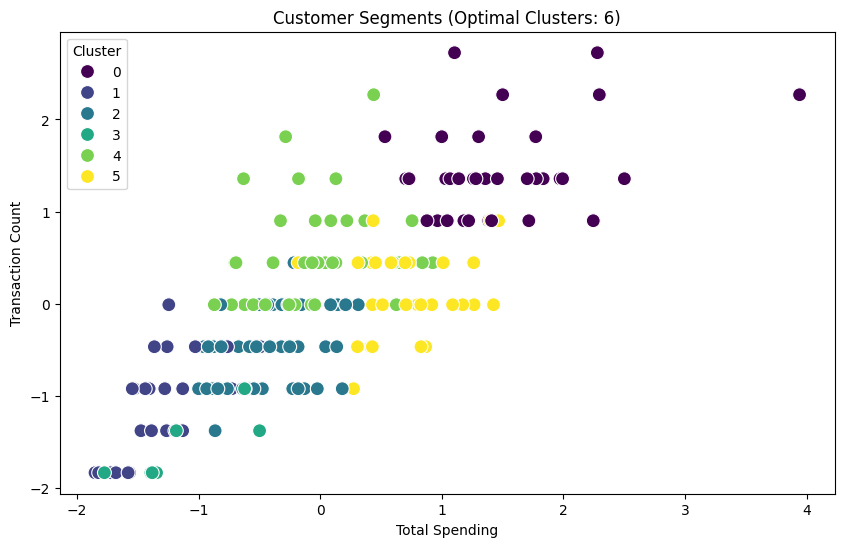

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

transactions = transactions.merge(customers, on="CustomerID", how="left")

customer_features = transactions.groupby("CustomerID").agg(
    total_spending=("TotalValue", "sum"),
    transaction_count=("TransactionID", "count"),
    avg_quantity=("Quantity", "mean")
).reset_index()

scaler = StandardScaler()
numeric_features = ["total_spending", "transaction_count", "avg_quantity"]
customer_features[numeric_features] = scaler.fit_transform(customer_features[numeric_features])

optimal_clusters = 0
lowest_dbi = float("inf")

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(customer_features[numeric_features])
    dbi = davies_bouldin_score(customer_features[numeric_features], cluster_labels)
    if dbi < lowest_dbi:
        lowest_dbi = dbi
        optimal_clusters = n_clusters

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features["Cluster"] = kmeans.fit_predict(customer_features[numeric_features])

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_features["total_spending"],
    y=customer_features["transaction_count"],
    hue=customer_features["Cluster"],
    palette="viridis",
    s=100
)
plt.title(f"Customer Segments (Optimal Clusters: {optimal_clusters})")
plt.xlabel("Total Spending")
plt.ylabel("Transaction Count")
plt.legend(title="Cluster")
plt.show()

# print(f"Optimal Number of Clusters: {optimal_clusters}")
# print(f"Davies-Bouldin Index: {lowest_dbi:.2f}")
